In [3]:
import sys
sys.path.append('../')
sys.path.append('../../')

%matplotlib inline

from errorpypagation import project
p = project.Project()

In [4]:
p.load("teil1.dat")

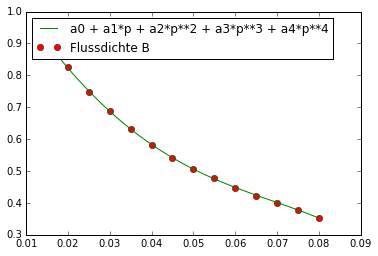

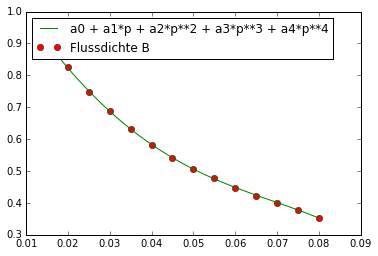

In [5]:
p.fit("a4*p**4 + a3*p**3 + a2*p**2 + a1*p + a0", ["p","B"], ["a0","a1","a2","a3","a4"], ignore_dim=True, plot=True)

In [6]:
# differentiate fit function
from sympy import diff
from quantities import parse_expr
fit_function = parse_expr("a4*p**4 + a2*p**2 + a1*p + a0",p.data)
ableitung = diff(fit_function, p.data["p"])
BdBdh = fit_function*ableitung

# save values of B*dB/dh at certain positions
Bi = BdBdh.subs(p.data["p"],p.data["p_Bi_m"])
p.assign("BdBdh_Bi", value=Bi, unit="T**2/m", ignore_dim=True)
Mn = BdBdh.subs(p.data["p"],p.data["p_Mn_m"])
p.assign("BdBdh_Mn", value=Mn, unit="T**2/m", ignore_dim=True)
Ta = BdBdh.subs(p.data["p"],p.data["p_Ta_m"])
p.assign("BdBdh_Ta", value=Ta, unit="T**2/m", ignore_dim=True)

In [7]:
p.code("""
chi_Bi = F_Bi*mu0/(m_Bi/rho_Bi)/BdBdh_Bi
chi_Mn = F_Mn*mu0/(m_Mn/rho_Mn)/BdBdh_Mn
chi_Ta = F_Ta*mu0/(m_Ta/rho_Ta)/BdBdh_Ta
""")

In [8]:
p.table("chi_Bi","chi_Mn","chi_Ta")

\begin{table}[H]
\centering
	\begin{tabular}{|c|c|c|}
	\hline
	chi_Bi [$1$] & chi_Mn [$1$] & chi_Ta [$1$]\\ \hline
	$(-1.2 \pm 0.4) \times 10^{-4}$ & $(5.9 \pm 1.6) \times 10^{-4}$ & $(2.4 \pm 0.8) \times 10^{-4}$\\ \hline
	\end{tabular}
\end{table}


<IPython.core.display.Latex object>

In [11]:
p.load("teil2.dat")